In [282]:
import pandas as pd

In [284]:
import numpy as np


In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
df1=pd.read_csv(r"C:\Users\saran\Downloads\subject-info.csv")

In [290]:
df2=pd.read_csv(r"C:\Users\saran\Downloads\test_measure.csv")

In [294]:
df = df2.merge(df1, on="ID", how="inner")

In [296]:
#save merge file as new csv file
df.to_csv('merged_subject_test.csv', index=False)
df3 = pd.read_csv('merged_subject_test.csv')
df3.head(10)

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test_x,ID,Age,Weight,Height,Humidity,Temperature,Sex,ID_test_y
0,0,5.0,63.0,478.0,360.0,27.0,13.3,2_1,2,33.8,68.0,171.1,NaN,NaN,0,2_1
1,2,5.0,75.0,401.0,295.0,23.0,10.3,2_1,2,33.8,68.0,171.1,NaN,NaN,0,2_1
2,4,5.0,82.0,449.0,319.0,29.0,12.2,2_1,2,33.8,68.0,171.1,NaN,NaN,0,2_1
3,7,5.0,87.0,461.0,340.0,28.0,12.8,2_1,2,33.8,68.0,171.1,NaN,NaN,0,2_1
4,9,5.0,92.0,574.0,417.0,28.0,14.6,2_1,2,33.8,68.0,171.1,NaN,NaN,0,2_1
5,11,5.0,94.0,624.0,458.0,26.0,15.7,2_1,2,33.8,68.0,171.1,NaN,NaN,0,2_1
6,14,5.0,95.0,619.0,451.0,26.0,15.4,2_1,2,33.8,68.0,171.1,NaN,NaN,0,2_1
7,16,5.0,96.0,681.0,493.0,26.0,16.4,2_1,2,33.8,68.0,171.1,NaN,NaN,0,2_1
8,17,5.0,97.0,776.0,572.0,26.0,18.5,2_1,2,33.8,68.0,171.1,NaN,NaN,0,2_1
9,19,5.0,97.0,774.0,576.0,27.0,19.0,2_1,2,33.8,68.0,171.1,NaN,NaN,0,2_1


### Q49.Identify the test name that had the shortest time duration.

In [300]:
# Calculate the duration of each test by finding the max time for each test ID
duration_test = df2.groupby("ID_test")["time"].max()

# Identify the test with the shortest duration
short_test = duration_test.idxmin()
short_duration = duration_test.min()

print(f"Test with the short duration: {short_test}, Duration: {short_duration} seconds")

Test with the short duration: 564_1, Duration: 495 seconds


### Q50.What is the percentage difference in mean Carbon dioxide production between male and female athletes?

In [302]:
# Merge datasets on subject ID (assuming 'ID' is the common column)
merged_data = df2.merge(df1, on="ID")


# Calculate mean VCO2 for males and females
male_vco2_mean = merged_data[merged_data["Sex"] == 0]["VCO2"].mean(skipna = True)
female_vco2_mean = merged_data[merged_data["Sex"] == 1]["VCO2"].mean(skipna = True)
# Compute percentage difference
percentage_diff = ((male_vco2_mean - female_vco2_mean) / female_vco2_mean) * 100

# Print the result
print(f"Percentage difference in mean Carbon Dioxide production: {percentage_diff:.2f}%")


Percentage difference in mean Carbon Dioxide production: 41.43%


### Q51.Calculate the Fitness Index, generate a bar chart of Fitness Index categories, and export it as SVG file.

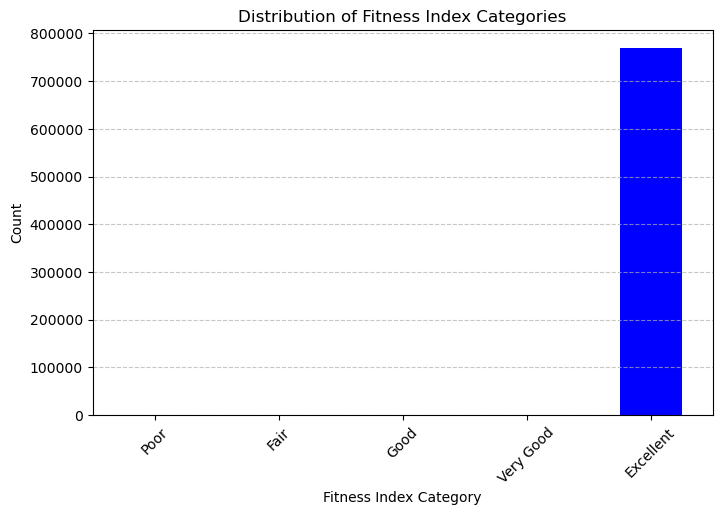

In [195]:
# Define a function to calculate the Fitness Index
def calculate_fitness_index(row):
    return (row["VO2"] / row["Age"]) * 100  
# Apply the function to create a new column
df["Fitness_Index"] = df.apply(calculate_fitness_index, axis=1)

# Categorize Fitness Index
bins = [0, 50, 70, 85, 100, float('inf')]
labels = ["Poor", "Fair", "Good", "Very Good", "Excellent"]
df["Fitness_Category"] = pd.cut(df["Fitness_Index"], bins=bins, labels=labels)

# Count occurrences of each category
category_counts = df["Fitness_Category"].value_counts().sort_index()

# Generate bar chart
plt.figure(figsize=(8, 5))
category_counts.plot(kind="bar", color=["red", "orange", "yellow", "green", "blue"])
plt.xlabel("Fitness Index Category")
plt.ylabel("Count")
plt.title("Distribution of Fitness Index Categories")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the figure as SVG
plt.savefig("fitness_index_chart.svg", format="svg")

# Show the plot
plt.show()
    

### Q52."arr=np.array([
[3, 5, 7, 9], 
[2, 0, 8, 10], 
[1, 4, 8, 12], 
[5, 9, 14, 15] 
] )
Transpose this numpy matrix. and calculate sum of each row after transposing. Find the row with highest sum(after transposing)"

In [308]:
# Define the matrix
arr = np.array([
    [3, 5, 7, 9], 
    [2, 0, 8, 10], 
    [1, 4, 8, 12], 
    [5, 9, 14, 15] 
])

# Transpose the matrix
arr_transposed = arr.T

# Calculate the sum of each row after transposing
sum_of_rows = np.sum(arr_transposed, axis=1)

# Find the row index with the highest sum
index_sum_max= np.argmax(sum_of_rows)

# Output results
print("Transposed Matrix:\n", arr_transposed)
print("Sum of each row after transposing:", sum_of_rows)
print("Row index with highest sum (after transposing):", index_sum_max)
print("Highest sum:", sum_of_rows[index_sum_max])

Transposed Matrix:
 [[ 3  2  1  5]
 [ 5  0  4  9]
 [ 7  8  8 14]
 [ 9 10 12 15]]
Sum of each row after transposing: [11 18 37 46]
Row index with highest sum (after transposing): 3
Highest sum: 46


### Q53.Display participant details with highest average cardiorespiratory fitness in terms of VO2 max.

In [209]:
# Filter out invalid VO2 values
df2_clean = df2[(df2["VO2"] > 0)].dropna(subset=["VO2"])

# Calculate average VO2 max for each participant (grouped by ID)
avg_vo2 = df2_clean.groupby("ID")["VO2"].mean().reset_index()
avg_vo2.columns = ["ID", "Avg_VO2"]

# Find the participant ID with the highest average VO2
max_vo2_participant = avg_vo2.loc[avg_vo2["Avg_VO2"].idxmax()]

# Get the full participant details from subject-info
participant_details = df1[df1["ID"] == max_vo2_participant["ID"]]

# Print the participant details and their average VO2 max
print("Participant Details with Highest Average VO2 max:")
print(participant_details)
print("\nAverage VO2 max:", max_vo2_participant["Avg_VO2"])

Participant Details with Highest Average VO2 max:
      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test
350  23.6    86.0   190.0      45.0         32.0    0  409   409_1

Average VO2 max: 3994.835294117647


### Q54.calculate the heart rate reserve and show the distribution as density plot

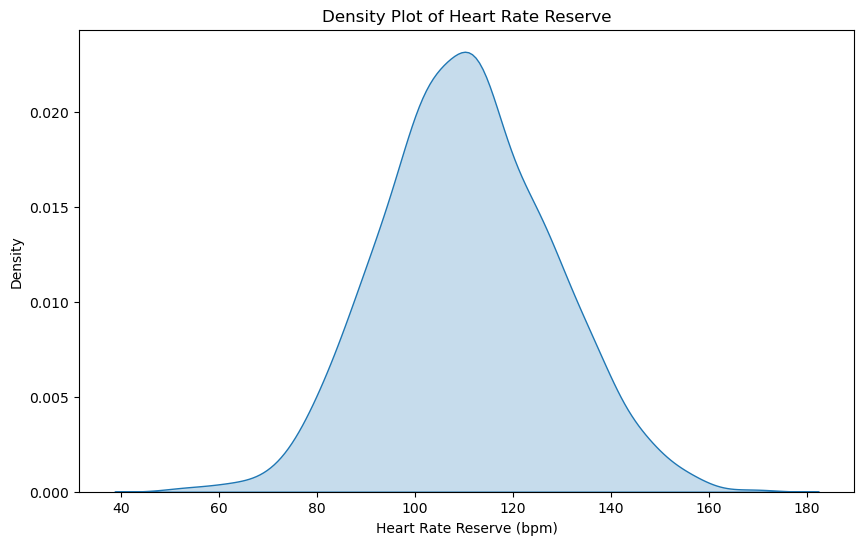

In [304]:
# Calculate heart rate reserve (HRR) for each participant (max HR - min HR)
hrr = df2.groupby('ID')['HR'].agg(lambda x: x.max() - x.min()).reset_index()
hrr.columns = ['ID', 'HRR']

# Plot the density distribution of HRR
plt.figure(figsize=(10, 6))
sns.kdeplot(data=hrr, x="HRR", fill=True)
plt.title("Density Plot of Heart Rate Reserve")
plt.xlabel("Heart Rate Reserve (bpm)")
plt.ylabel("Density")
plt.show()

### Q55. Create a boxplot comparing heart rates between males and females, showing hue as speed category.

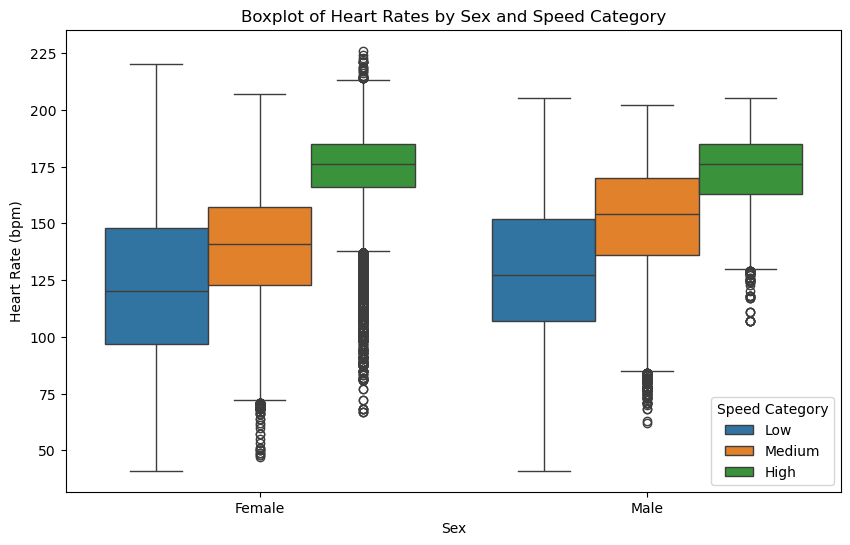

In [215]:
# Merge the datasets on the 'ID' column to bring in the sex information
merged_df = pd.merge(df2, df1[['ID', 'Sex']], on='ID', how='left')

# Convert 'Sex' to a categorical variable for clarity
merged_df['Sex'] = merged_df['Sex'].map({1: "Male", 0: "Female"})

# Create a speed category from the 'Speed' variable
# Here we use three quantile-based categories: Low, Medium, and High.
merged_df['Speed_Category'] = pd.qcut(merged_df['Speed'], q=3, labels=["Low", "Medium", "High"])

# Create the boxplot comparing heart rates by sex with hue as the speed category
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="Sex", y="HR", hue="Speed_Category")
plt.title("Boxplot of Heart Rates by Sex and Speed Category")
plt.xlabel("Sex")
plt.ylabel("Heart Rate (bpm)")
plt.legend(title="Speed Category")
plt.show()

### Q56.Choose any feature that follows a Gaussian distribution, convert it into a standard normal distribution, and visualize the results?

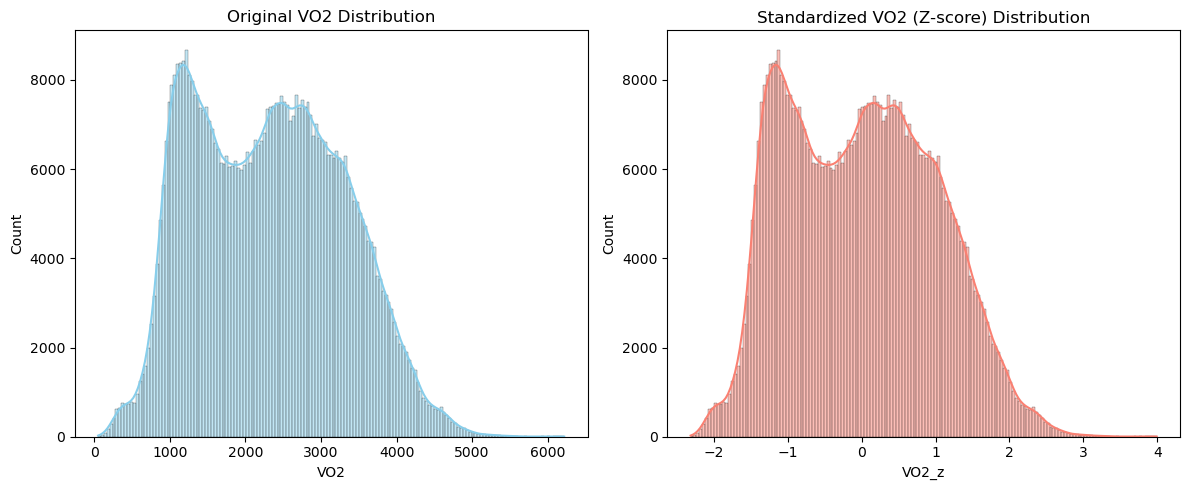

In [223]:
from scipy.stats import zscore
measurements = df2.dropna(subset=['VO2'])


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(measurements['VO2'], kde=True, color='skyblue')
plt.title('Original VO2 Distribution')


measurements['VO2_z'] = zscore(measurements['VO2'])


plt.subplot(1, 2, 2)
sns.histplot(measurements['VO2_z'], kde=True, color='salmon')
plt.title('Standardized VO2 (Z-score) Distribution')

plt.tight_layout()
plt.show()

### Q57.Identify the participant who has taken maximum number of Graded Exercise test and justify.

In [226]:
# Count the unique Graded Exercise tests per participant by counting unique 'ID_test'
test_counts = df2.groupby("ID")["ID_test"].nunique().reset_index(name="Test_Count")

# Identify the participant with the maximum number of tests
tests_max = test_counts['Test_Count'].max()
participant_tests_max = test_counts[test_counts['Test_Count'] == tests_max]

# Merge with subject_info to get full participant details
participant_details = pd.merge(participant_tests_max, df2, on="ID", how="left")

print("Participant(s) who took the maximum number of Graded Exercise tests:")
print(participant_details)

Participant(s) who took the maximum number of Graded Exercise tests:
       ID  Test_Count  time  Speed     HR     VO2    VCO2    RR    VE ID_test
0     506           5     0    5.0   78.0   235.0   194.0  17.0   8.2  506_26
1     506           5     4    5.0   83.0   676.0   523.0  24.0  19.4  506_26
2     506           5     9    5.0   89.0   512.0   361.0  12.0  10.6  506_26
3     506           5    12    5.0   93.0   561.0   413.0  16.0  13.5  506_26
4     506           5    15    5.0   96.0   540.0   392.0  18.0  13.0  506_26
...   ...         ...   ...    ...    ...     ...     ...   ...   ...     ...
2854  506           5  1309    5.0  111.0  1107.0  1367.0  24.0  43.4   506_1
2855  506           5  1310    5.0  109.0  1083.0  1343.0  24.0  42.7   506_1
2856  506           5  1312    5.0  106.0  1054.0  1308.0  25.0  41.8   506_1
2857  506           5  1314    5.0  104.0  1079.0  1344.0  28.0  44.9   506_1
2858  506           5  1316    5.0  104.0  1097.0  1360.0  28.0  45.5   5

### Q58.For participant ID 725 show trend of any three variables against time in a single canva ?

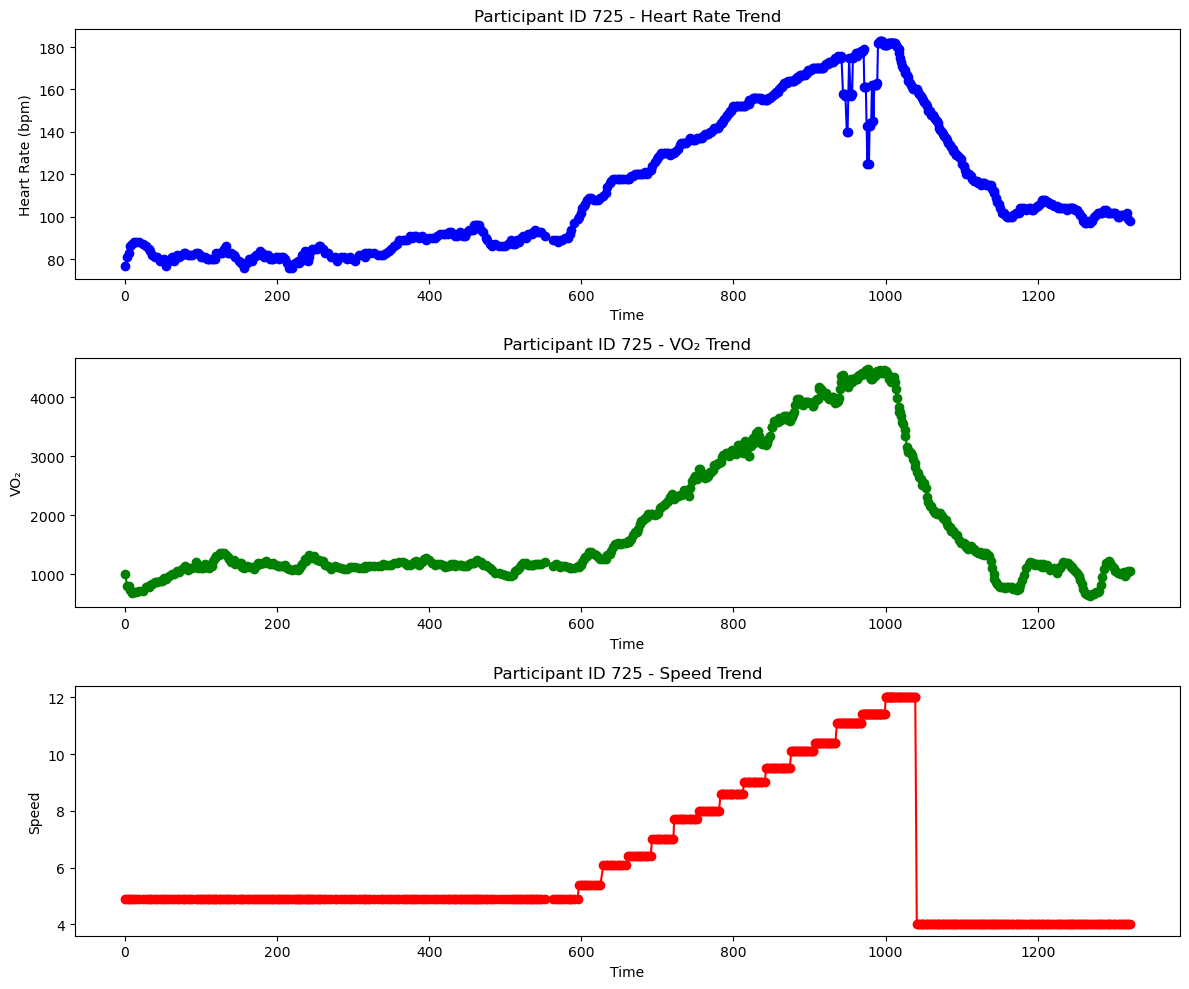

In [229]:
# Filter the data for participant ID 725
participant_725 = df2[df2['ID'] == 725]

# Create a figure with 3 subplots (one for each variable)
plt.figure(figsize=(12, 10))

# Plot Heart Rate (HR) vs. time
plt.subplot(3, 1, 1)
plt.plot(participant_725['time'], participant_725['HR'], marker='o', linestyle='-', color='blue')
plt.title("Participant ID 725 - Heart Rate Trend")
plt.xlabel("Time")
plt.ylabel("Heart Rate (bpm)")

# Plot VO₂ vs. time
plt.subplot(3, 1, 2)
plt.plot(participant_725['time'], participant_725['VO2'], marker='o', linestyle='-', color='green')
plt.title("Participant ID 725 - VO₂ Trend")
plt.xlabel("Time")
plt.ylabel("VO₂")

# Plot Speed vs. time
plt.subplot(3, 1, 3)
plt.plot(participant_725['time'], participant_725['Speed'], marker='o', linestyle='-', color='red')
plt.title("Participant ID 725 - Speed Trend")
plt.xlabel("Time")
plt.ylabel("Speed")

plt.tight_layout()
plt.show()

### Q59.Create a scatter plot with a regression line using Altair, take a random sample data with features 'x' and 'y'.

In [231]:
import altair as alt

In [234]:
# Create random sample data
np.random.seed(42)
n = 100
x = np.random.randn(n)
y = 2 * x + np.random.randn(n)
df = pd.DataFrame({'x': x, 'y': y})

# Create a scatter plot with a regression line
scatter = alt.Chart(df).mark_point().encode(
    x='x',
    y='y'
)

regression_line = scatter.transform_regression('x', 'y').mark_line(color='red')

chart = scatter + regression_line
chart

alt.LayerChart(...)

### Q60.Use a strip plot to illustrate the distribution of Heart Rate Reserve (HRR) values, highlighting the lowest and highest values to showcase the range of HRR.

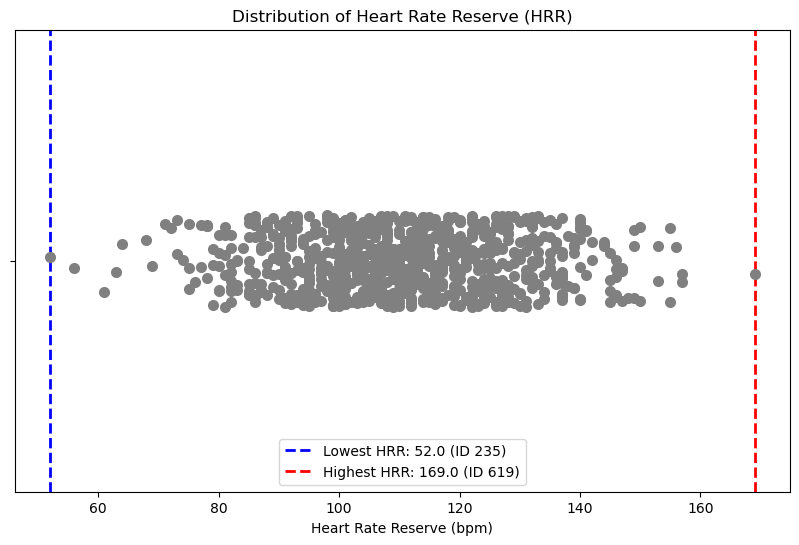

In [237]:
# Calculate heart rate reserve (HRR) for each participant (max HR - min HR)
hrr = df2.groupby('ID')['HR'].agg(lambda x: x.max() - x.min()).reset_index()
hrr.columns = ['ID', 'HRR']

# Identify the lowest and highest HRR values
hrr_min = hrr['HRR'].min()
hrr_max = hrr['HRR'].max()
hrr_min_id = hrr[hrr['HRR'] == hrr_min]['ID'].values[0]
hrr_max_id = hrr[hrr['HRR'] == hrr_max]['ID'].values[0]

# Create the strip plot
plt.figure(figsize=(10, 6))
ax = sns.stripplot(x='HRR', data=hrr, jitter=True, size=8, color='gray')
plt.title("Distribution of Heart Rate Reserve (HRR)")
plt.xlabel("Heart Rate Reserve (bpm)")

# Highlight the lowest and highest HRR values with vertical lines and annotations
plt.axvline(hrr_min, color='blue', linestyle='--', linewidth=2, label=f'Lowest HRR: {hrr_min} (ID {hrr_min_id})')
plt.axvline(hrr_max, color='red', linestyle='--', linewidth=2, label=f'Highest HRR: {hrr_max} (ID {hrr_max_id})')

plt.legend()
plt.show()

### Q61.Create a swarm plot to visualize the relationship between humidity and temperature for each gender.

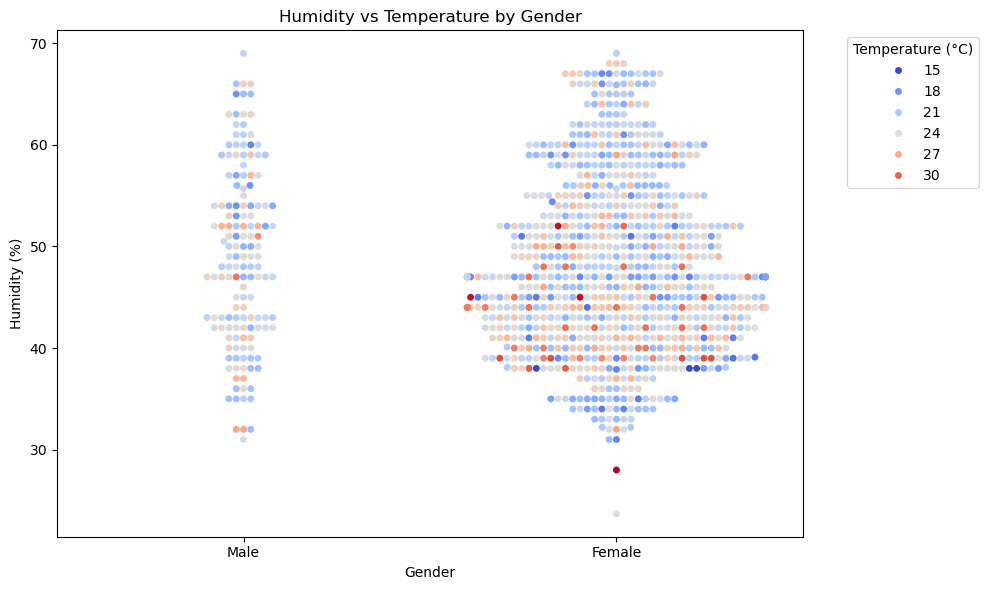

In [240]:
# Map gender for better visualization
df1['Sex'] = df1['Sex'].map({0: 'Female', 1: 'Male'})

# Create the swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df1, x='Sex', y='Humidity', hue='Temperature', palette='coolwarm')

plt.title('Humidity vs Temperature by Gender')
plt.xlabel('Gender')
plt.ylabel('Humidity (%)')
plt.legend(title='Temperature (°C)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Q62.Analyze the relationship between fitness levels and physiological attributes and identify trends in the scatter plot of VO2 max (ml/kg/min) versus age

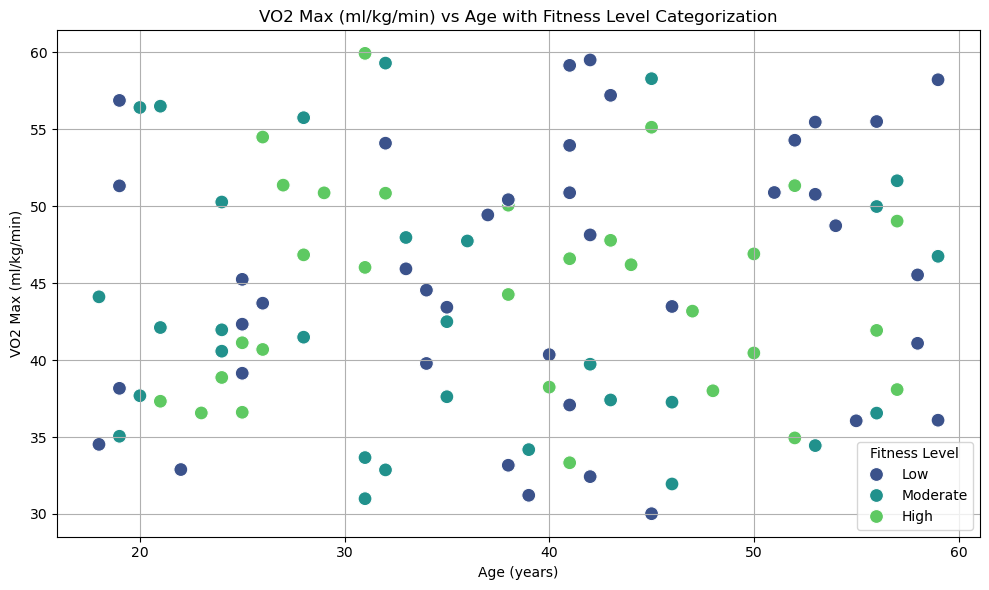

In [247]:
# Calculate average VO2 max for each participant
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 60, 100),              # Age of participants
    'VO2_max': np.random.uniform(30, 60, 100),          # VO2 max (ml/kg/min)
    'Fitness_Level': np.random.choice(['Low', 'Moderate', 'High'], 100)  # Fitness levels
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='VO2_max', hue='Fitness_Level', data=df, palette='viridis', s=100, edgecolor='w')


plt.title('VO2 Max (ml/kg/min) vs Age with Fitness Level Categorization')
plt.xlabel('Age (years)')
plt.ylabel('VO2 Max (ml/kg/min)')
plt.legend(title='Fitness Level')
plt.grid(True)
plt.tight_layout()
plt.show()

### Q63.Calculate the warm-up time, GET time, cool-down time, for each athlete test and find athlete who has maximum GET time ?


In [249]:
# Clean test data: remove rows where VO2 or VCO2 are zero or missing
df2_cleaned = df2[(df2["VO2"] > 0) & (df2["VCO2"] > 0)].dropna(subset=["VO2", "VCO2"])

# Group the data by each athlete's test ID
grouped = df2_cleaned.groupby("ID_test")

results = []

# Loop through each athlete group to calculate the times
for athlete_id, group in grouped:
    group = group.sort_values("time")
    try:
        # Calculate RER (Respiratory Exchange Ratio)
        group["RER"] = group["VCO2"] / group["VO2"]
        rer_diff = group["RER"].diff()
        
        # Find the time of maximum RER increase (GET point estimate)
        get_time = group.loc[rer_diff.idxmax(), "time"]

        # Total test duration
        end_time = group["time"].max()

        # Append results
        results.append({
            "ID_test": athlete_id,
            "Warm_up_time": get_time,
            "GET_time": get_time,
            "Cool_down_time": end_time - get_time
        })
    except:
        continue  # Skip if any error occurs

# Create a DataFrame with results
results_df = pd.DataFrame(results)

# Find athlete with maximum GET time
max_get_athlete = results_df.loc[results_df["GET_time"].idxmax()]

print("First 5 athletes with calculated times:")
print(results_df.head())

print("\nAthlete with maximum GET time:")
print(max_get_athlete)

First 5 athletes with calculated times:
  ID_test  Warm_up_time  GET_time  Cool_down_time
0   100_1            35        35             991
1   101_1           150       150             874
2   102_1            34        34             836
3   103_1            54        54             807
4   104_1            26        26            1118

Athlete with maximum GET time:
ID_test           699_1
Warm_up_time       1659
GET_time           1659
Cool_down_time       53
Name: 771, dtype: object


### Q64."Compare the time it takes to multiply each element in a large array by 2 using an explicit loop and a 
vectorized operation with NumPy"


In [255]:
import time

In [257]:
# Create a large array with 10 million elements
arr = np.random.rand(10**7)

# Measure time for explicit loop
start_time_loop = time.time()

result_loop = np.zeros_like(arr)  # Create an empty array to store results
for i in range(len(arr)):
    result_loop[i] = arr[i] * 2

end_time_loop = time.time()
loop_time = end_time_loop - start_time_loop

# Measure time for vectorized operation
start_time_vectorized = time.time()

result_vectorized = arr * 2  # Vectorized multiplication by 2

end_time_vectorized = time.time()
vectorized_time = end_time_vectorized - start_time_vectorized

# Print the results
print(f"Time using explicit loop: {loop_time:.6f} seconds")
print(f"Time using vectorized operation: {vectorized_time:.6f} seconds")

Time using explicit loop: 4.412521 seconds
Time using vectorized operation: 0.031793 seconds
